In [4]:
from math import *
def S13(x1,x2):
    return x1**2/2
def S23(x1,x2):
    return (x2**2-x1**2)/2
x1=(-2+4*sqrt(2))/14
x2=(16-4*sqrt(2))/14
print(S13(x1,x2)+S23(x1,x2))

0.2729098571842955


# classifier

In [5]:
from random import *
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt

global threshold

def classify(x):
    return x[0][0]+x[0][1]<=threshold
x=[randint(0,1) for i in range(100)]
mu1=np.array([[1,1]])
mu2=np.array([[1.5,1.5]])
#mu2=np.array([[3,3]])
if mu2[0][0]<2:
    threshold=2.5
else:
    threshold=4
Sigma=np.array([[0.2,0],[0,0.2]])
R = cholesky(Sigma)
for T in range(10):
    sum=0
    for i in range(100):
        if x[i]:
            mu=mu1
        else:
            mu=mu2
        s=np.dot(np.random.randn(1,2), R) + mu
        if(classify(s)==x[i]):
            sum+=1
    print(sum/100.0)

0.77
0.81
0.77
0.82
0.81
0.74
0.76
0.82
0.77
0.78


# bayes

0.42 -0.087
-0.2 -3.3
0.58946993681337
1.3 -0.32
0.013185867160322825
0.39 0.71
0.0003954645535135942
-1.6 -5.3
2.9856488990065516e-07
-0.029 0.89
7.514854382340825e-09
-0.23 1.9
9.370819637118595e-11
0.27 -0.3
2.735973905709876e-12
-1.9 0.76
4.2221780361374717e-14
0.87 -1.0
1.2330587238862248e-15


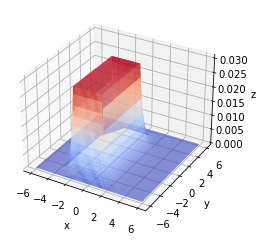

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
def f(a,b,n):
    return ((b-a)**(1-n)-(b+6)**(1-n)-(6-a)**(1-n)+12**(1-n))/n/(n-1)
def g(x,y,xl1,xu1,xl2,xu2,n):
    xl1=min(x,xl1)
    xu1=max(x,xu1)
    xl2=min(y,xl2)
    xu2=max(y,xu2)
    return f(xl1,xu1,n)*f(xl2,xu2,n)
fp=open("input.txt","r")
xl1,xu1,xl2,xu2=6,-6,6,-6
K=200
T=K*1j

for n in range(1,11):
    x1,x2=[float(x) for x in fp.readline().split(' ')]
    print(x1,x2)
    xl1=min(xl1,x1)
    xu1=max(xu1,x1)
    xl2=min(xl2,x2)
    xu2=max(xu2,x2)
    if n>=2:
        x, y = np.mgrid[-6:6:T, -6:6:T]
        z = np.zeros([K,K])
        s=0
        for i in range(K):
            for j in range(K):
                z[i][j]=g(x[i][j],y[i][j],xl1,xu1,xl2,xu2,n)
                s+=z[i][j]*(12.0/K)**2
        for i in range(K):
            for j in range(K):
                z[i][j]/=s
        print(s)
        s=0
        for i in range(K):
            for j in range(K):
                s+=z[i][j]*(12.0/K)**2
        ax = plt.subplot(111, projection='3d')
        ax.plot_surface(x, y, z, rstride=2, cstride=1, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        plt.savefig("output/"+str(n)+".png")



# HMM

In [10]:
from random import *
def CalcProb(A,B,seq):
    m=5
    L=len(seq)
    pre=[[0 for j in range(m)]for i in range(L)]
    pre[0][0] = 1
    for i in range(1, L):
        for j in range(m):
            for k in range(m if i==L-1 else m-1):
                pre[i][j] += pre[i - 1][k] * A[k][j] * B[j][ord(seq[i]) - 65]
    return pre[L-1][m-1]

def Baum_Welch(seq):
    n,m=4,5
    A=[[0 for j in range(m)]for i in range(m)]
    B=[[0 for j in range(n)]for i in range(m)]
    A[m-1][m-1]=1
    for i in range(0,m-1):
        for j in range(1,m):
            A[i][j]=0.25
    for i in range(m):
        for j in range(n):
            B[i][j]=0.25
    L=len(seq)
    eps=1
    while eps>1e-5:
        eps=0
        pre=[[0 for j in range(m)]for i in range(L)]
        suf=[[0 for j in range(m)]for i in range(L)]

        pre[0][0]=1
        for i in range(1,L):
            for j in range(m):
                for k in range(m if i==L-1 else m-1):
                    pre[i][j]+=pre[i-1][k]*A[k][j]*B[j][ord(seq[i])-65]

        suf[L-1][m-1]=1
        for i in range(L-2,-1,-1):
            for j in range(m-1):
                for k in range(m):
                    suf[i][j]+=suf[i+1][k]*A[j][k]*B[k][ord(seq[i+1])-65]

        r=[[[0 for k in range(L)]for j in range(m)]for i in range(m)]
        for i in range(m):
            for j in range(m):
                for t in range(1,L):
                    r[i][j][t]=pre[t-1][i]*A[i][j]*B[j][ord(seq[t])-65]*suf[t][j]

        for i in range(1,m-1):
            for j in range(m):
                fenzi=0
                fenmu=0
                for t in range(1,L):
                    fenzi+=r[i][j][t]
                    for k in range(m):
                        fenmu+=r[i][k][t]
                t=A[i][j]
                if fenmu==0:
                    A[i][j]=0
                else:
                    A[i][j]=fenzi/fenmu
                eps=max(eps,abs(A[i][j]-t))

        for i in range(1,m-1):
            for j in range(n):
                fenzi=0
                fenmu=0
                for t in range(1,L):
                    for k in range(m):
                        fenmu+=r[k][i][t]
                        if ord(seq[t])-65==j:
                            fenzi+=r[k][i][t]
                t=B[i][j]
                if fenmu==0:
                    B[i][j]=0
                else:
                    B[i][j]=fenzi/fenmu
                eps=max(eps,abs(B[i][j]-t))
    print(CalcProb(A,B,seq))
    return (A,B)

def classify(A1,B1,A2,B2,seq):
    p1=CalcProb(A1,B1,seq)
    p2=CalcProb(A2,B2,seq)
    print(p1,p2)
    if p1>p2:
        print('模型一')
    else:
        print('模型二')
    print('P(w2|x)/P(w1|x)=',p2/p1)
para1=Baum_Welch('AABBCCDD')
para2=Baum_Welch('DDABCBA')

print('模型一：')
for x in para1[0]:
    print(x)
print()
for x in para1[1]:
    print(x)
print()

print('模型二：')
for x in para2[0]:
    print(x)
print()
for x in para2[1]:
    print(x)
print()

classify(para1[0],para1[1],para2[0],para2[1],'ABBBCDDD')
classify(para1[0],para1[1],para2[0],para2[1],'DADBCBAA')
classify(para1[0],para1[1],para2[0],para2[1],'CDCBABA')
classify(para1[0],para1[1],para2[0],para2[1],'ADBBBCD')
classify(para1[0],para1[1],para2[0],para2[1],'BADBDCBA')

1.2059083522441819e-05
3.5020800000000056e-05
模型一：
[0, 0.25, 0.25, 0.25, 0.25]
[0.0, 0.2777777777777778, 0.2777777777777778, 0.2777777777777778, 0.16666666666666663]
[0.0, 0.2777777777777778, 0.2777777777777778, 0.2777777777777778, 0.16666666666666663]
[0.0, 0.2777777777777778, 0.2777777777777778, 0.2777777777777778, 0.16666666666666663]
[0, 0, 0, 0, 1]

[0.25, 0.25, 0.25, 0.25]
[0.16666666666666666, 0.33333333333333337, 0.3333333333333334, 0.16666666666666663]
[0.16666666666666666, 0.33333333333333337, 0.3333333333333334, 0.16666666666666663]
[0.16666666666666666, 0.33333333333333337, 0.3333333333333334, 0.16666666666666663]
[0.25, 0.25, 0.25, 0.25]

模型二：
[0, 0.25, 0.25, 0.25, 0.25]
[0.0, 0.2666666666666667, 0.2666666666666667, 0.2666666666666667, 0.2]
[0.0, 0.2666666666666667, 0.2666666666666667, 0.2666666666666667, 0.2]
[0.0, 0.2666666666666667, 0.2666666666666667, 0.2666666666666667, 0.2]
[0, 0, 0, 0, 1]

[0.25, 0.25, 0.25, 0.25]
[0.20000000000000004, 0.4, 0.20000000000000004, 0.2]

# kmeans

In [13]:
import random
import numpy as np
from math import *
import datetime
def dis(a,b):
    return np.linalg.norm(a-b)
be=datetime.datetime.now()
P=[]
fp=open('A1.txt','r')
for i in range(int(fp.readline())):
    line=fp.readline()
    a=list(map(float,line.split()))
    P.append(np.array([a[0],a[1],a[2]]))
fp.close()
fp=open('B1.txt','r')
for i in range(int(fp.readline())):
    line=fp.readline()
    a=list(map(float,line.split()))
    P.append(np.array([a[0],a[1],a[2]]))
fp.close()
fp=open('C1.txt','r')
for i in range(int(fp.readline())):
    line=fp.readline()
    a=list(map(float,line.split()))
    P.append(np.array([a[0],a[1],a[2]]))
fp.close()
n=len(P)
o=random.sample(P,3)
belong=[0 for i in range(n)]
mark=True
while mark:
    mark=False
    newo=[np.array([0.0,0,0]) for i in range(3)]
    for i in range(n):
        L=[dis(P[i],b) for b in o]
        if L.index(min(L))!=belong[i]:
            mark=True
            belong[i]=L.index(min(L))
        newo[belong[i]]+=P[i]
    for i in range(3):
        c=belong.count(i)
        o[i]=newo[i]/c
if list(o[0])>list(o[1]):
    o[0],o[1]=o[1],o[0]
if list(o[1])>list(o[2]):
    o[1],o[2]=o[2],o[1]
if list(o[0])>list(o[2]):
    o[0],o[2]=o[2],o[0]
print('第一簇的中心点')
print(o[0])
print('第二簇的中心点')
print(o[1])
print('第三簇的中心点')
print(o[2])
print('程序用时')
print(datetime.datetime.now()-be)

第一簇的中心点
[6.70313276 7.95088927 6.54527852]
第二簇的中心点
[1.64607588 1.72437879 1.68188205]
第三簇的中心点
[ 7.02596455  8.01285952 11.44865308]
程序用时
0:00:02.791690


In [17]:
import numpy as np

def _fft_n2(a, invert):
    '''O(n^2)'''
    N = len(a)
    w = np.arange(N)
    i = 2j if invert else -2j
    m = w.reshape((N, 1)) * w
    W = np.exp(m * i * np.pi / N)
    return np.concatenate(np.dot(W, a.reshape((N,1))))  # important, cannot use *


def _fft(a, invert=False):
    '''recursion version'''
    N = len(a)
    if N == 1:
        return [a[0]]
    elif N & (N - 1) == 0:  # O(nlogn),  2^k
        even = _fft(a[::2], invert)
        odd = _fft(a[1::2], invert)
        i = 2j if invert else -2j
        factor = np.exp(i * np.pi * np.arange(N // 2) / N)
        prod = factor * odd
        return np.concatenate([even + prod, even - prod])
    else:
        return _fft_n2(a, invert)


def _fft2(a, invert=False):
    ''' iteration version'''

    def rev(x):
        ret = 0
        for i in range(r):
            ret <<= 1
            if x & 1:
                ret += 1
            x >>= 1
        return ret

    N = len(a)
    if N & (N - 1) == 0:  # O(nlogn),  2^k
        r = int(np.log(N))
        c = np.array(a,dtype='complex')
        i = 2j if invert else -2j
        w = np.exp(i * np.pi / N)
        for h in range(r - 1, -1, -1):
            p = 2**h
            z = w**(N / p / 2)
            for k in range(N):
                if k % p == k % (2 * p):
                    c[k], c[k + p] = c[k] + c[k + p], c[k] * z**(k % p)

        return np.asarray([c[rev(i)] for i in range(N)])
    else:  # O(n^2)
        return _fft_n2(a, invert)


def fft(a):
    '''fourier[a]'''
    n = len(a)
    if n == 0:
        raise Exception("[Error]: Invalid length: 0")
    return _fft(a)


def ifft(a):
    '''invert fourier[a]'''
    n = len(a)
    if n == 0:
        raise Exception("[Error]: Invalid length: 0")
    return _fft(a, True) / n


def fft2(arr):
    return np.apply_along_axis(fft, 0,
                               np.apply_along_axis(fft, 1, np.asarray(arr)))


def ifft2(arr):
    return np.apply_along_axis(ifft, 0,
                               np.apply_along_axis(ifft, 1, np.asarray(arr)))


def test(n=128):
    print('\nsequence length:', n)
    print('fft')
    li = np.random.random(n)
    print(np.allclose(fft(li), np.fft.fft(li)))

    print('ifft')
    li = np.random.random(n)
    print(np.allclose(ifft(li), np.fft.ifft(li)))

    print('fft2')
    li = np.random.random(n * n).reshape((n, n))
    print(np.allclose(fft2(li), np.fft.fft2(li)))

    print('ifft2')
    li = np.random.random(n * n).reshape((n, n))
    print(np.allclose(ifft2(li), np.fft.ifft2(li)))


if __name__ == '__main__':
    for i in range(1, 4):
        test(i * 16)



sequence length: 16
fft
True
ifft
True
fft2
True
ifft2
True

sequence length: 32
fft
True
ifft
True
fft2
True
ifft2
True

sequence length: 48
fft
True
ifft
True
fft2
True
ifft2
True


In [18]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

pr = pkl.load(open("pr.pkl", 'rb'))
index2entry = pkl.load(open("index2entry.pkl", 'rb'))

pr = np.array(pr)

# arg_index = pr.argsort()

# for i in range(10):
#     index = arg_index[i]
#     print(pr[index])
#     print(index2entry[index])
# print()

# for i in range(10):
#     index = arg_index[len(pr) - 1 - i]
#     print(pr[index])
#     print(index2entry[index])
# out_link = pkl.load(open("out_link.pkl", 'rb'))
# normalized_out = []
in_link = pkl.load(open("in_link.pkl", 'rb'))
print(pearsonr(pr, in_link))
# for i in range(len(in_link)):
#     if(in_link[i] != 0):
#         normalized_out.append(in_link[i])
# bins = np.linspace(0, 0.01, 100)
# plt.xscale('log')
# plt.yscale('log')
# plt.hist(pr, bins)
# plt.show()

# plt.scatter(in_link, pr)
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'pr.pkl'